## Observations and Insights 

###### 1. according to the box plot below, the 'Capomulin' and 'Ramicane' led to the smallest tumor volume, which means they are the best drugs for the treatment.
######  2. Also, the interquartile ranges of those two have the lowest range, so the statement that 'capomulin' and 'ramicane' are the most effective treatment seems to be convincible. 
######  3.One of the mice taken Capomulin "m957", according to the line plot below, has demonstrated a clear effect of decrease in tumor volume.

In [216]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
mouse_study_combine = pd.merge(mouse_metadata, study_results,how= "inner", on= "Mouse ID")

# Display the data table for preview
mouse_study_combine.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [217]:
# Checking the number of mice.
mice = mouse_study_combine["Mouse ID"].count()

print(f"The number of mice is {mice}.")

The number of mice is 1893.


In [218]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = mouse_study_combine[mouse_study_combine.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [219]:
# Optional: Get all the data for the duplicate mouse ID. 

all_duplicate = mouse_study_combine[mouse_study_combine.duplicated(['Mouse ID',])]
all_duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [220]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_study_combine.drop_duplicates("Mouse ID")
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [221]:
# Checking the number of mice in the clean DataFrame.
mice_cleaned = clean_df["Mouse ID"].count()

print(f"The number of mice is {mice_cleaned}.")

The number of mice is 249.


## Summary Statistics

In [222]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = mouse_study_combine.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = mouse_study_combine.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = mouse_study_combine.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std = mouse_study_combine.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = mouse_study_combine.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": std, "SEM": sem})
summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [223]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


print(mouse_study_combine.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean', 'median', 'var','std','sem']}))


             Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

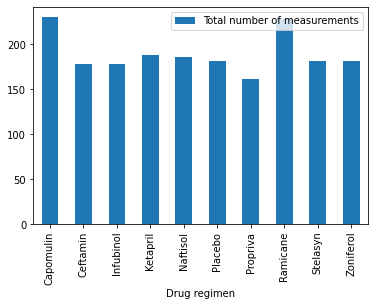

In [244]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

count_drug = mouse_study_combine.groupby(["Drug Regimen"]).count()

drug_list = count_drug.index.to_list()

x_axis = drug_list

drug_reg = clean_comb_data_gp["Mouse ID"]

drug_reg_df = pd.DataFrame({"Drug regimen": x_axis, "Total number of measurements": drug_reg })

bar_plot = drug_reg_df.plot.bar(x="Drug regimen", y="Total number of measurements")


Text(0, 0.5, 'Total number of measurements')

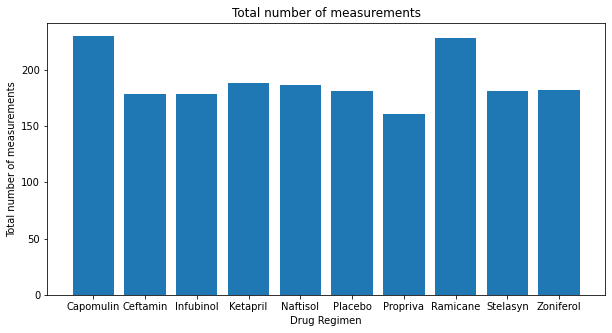

In [245]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
summ_list = summary_df.index.tolist()

drug_count = (mouse_study_combine.groupby(["Drug Regimen"])["Age_months"].count()).tolist()

x_axis = summ_list

plt.figure(figsize=(10,5))

plt.bar(x_axis, drug_count)

plt.title("Total number of measurements")
plt.xlabel("Drug Regimen")
plt.ylabel("Total number of measurements") 


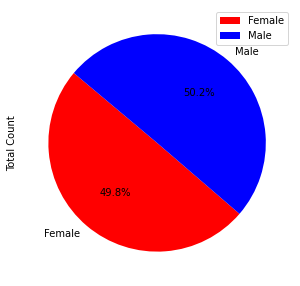

In [250]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
groupby_gender = mouse_study_combine.groupby(["Mouse ID","Sex"])

mouse_gender_df = pd.DataFrame(groupby_gender.size())

mouse_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())

mouse_gender.columns = ["Total Count"]

mouse_gender["Percentage of Sex"] = ((mouse_gender["Total Count"]/mouse_gender["Total Count"].sum())*100)

plot = mouse_gender.plot.pie(y='Total Count',figsize=(5,5), colors = ['red', 'blue'], startangle=140, autopct="%1.1f%%")


(-1.1199424252250414,
 1.108518406658767,
 -1.1187558098703594,
 1.1087944513597645)

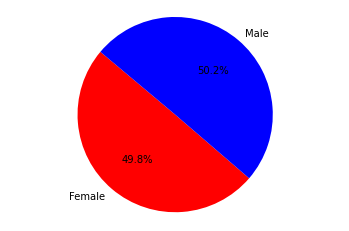

In [249]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Create Labels for the sections of the pie
plt.pie([49.80,50.20], labels=["Female","Male"], colors=['red', 'blue'], autopct="%1.1f%%", startangle=140)

#Set equal axis
plt.axis("equal") 

## Quartiles, Outliers and Boxplots

In [228]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

tr_regimes = mouse_study_combine[mouse_study_combine["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

tr_regimes = tr_regimes.sort_values(["Timepoint"], ascending=True)


tr_regimes_data = tr_regimes[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = pd.merge(tr_regimes, mouse_study_combine, on = ("Mouse ID", "Timepoint", "Drug Regimen"))
merge_df


,Mouse ID,Drug Regimen,Sex_x,Age_months_x,Weight (g)_x,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites_x,Sex_y,Age_months_y,Weight (g)_y,Tumor Volume (mm3)_y,Metastatic Sites_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,Male,21,16,45.000000,0
1,q132,Infubinol,Female,1,30,0,45.000000,0,Female,1,30,45.000000,0
2,i738,Capomulin,Female,23,20,0,45.000000,0,Female,23,20,45.000000,0
3,a520,Ramicane,Male,13,21,0,45.000000,0,Male,13,21,45.000000,0
4,p438,Ceftamin,Female,11,26,0,45.000000,0,Female,11,26,45.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,v923,Capomulin,Female,19,21,45,40.658124,2,Female,19,21,40.658124,2
810,m957,Capomulin,Female,3,19,45,33.329098,1,Female,3,19,33.329098,1
811,j119,Capomulin,Female,7,23,45,38.125164,1,Female,7,23,38.125164,1
812,s508,Ramicane,Male,1,17,45,30.276232,0,Male,1,17,30.276232,0


In [229]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = tr_regimes_data["Drug Regimen"].unique()

for t in treatment_list:
# Create empty list to fill with tumor vol data (for plotting)
    tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_df = tr_regimes_data.loc[tr_regimes_data["Drug Regimen"] == t,:]
    
    # add subset 
    tumor_vol.append(drug_df["Tumor Volume (mm3)"])
    
    # Determine outliers using upper and lower bounds
    quartiles = drug_df["Tumor Volume (mm3)"].quantile([.25,.50,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(t)
    print(f"Below {round(lower_bound, 2)} is out of the IQR.")
    print(f"Above {round(upper_bound, 2)} is out of the IQR.")
    print("")
    

Ramicane
Below 24.19 is out of the IQR.
Above 57.49 is out of the IQR.

Infubinol
Below 32.31 is out of the IQR.
Above 72.32 is out of the IQR.

Capomulin
Below 26.71 is out of the IQR.
Above 55.97 is out of the IQR.

Ceftamin
Below 32.82 is out of the IQR.
Above 71.19 is out of the IQR.



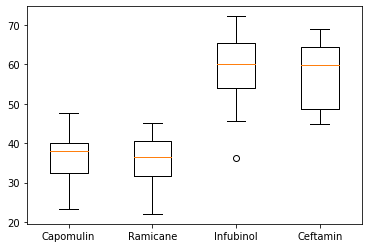

In [230]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

tr_regimens_sort = tr_regimes_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']

tr_regimens_sort_fr = tr_regimens_sort.to_frame()

four_regimens = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)

tumor_list_df = tumor_list_df.reindex(four_regimens)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]

plt.boxplot(tumor_vols, labels=four_regimens)
plt.show()


## Line and Scatter Plots

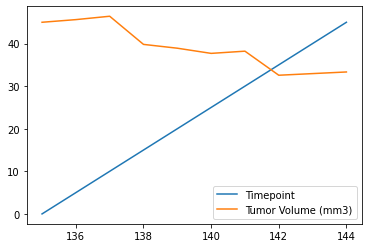

In [239]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# a moust treated with Capomulin v923, m957, j119 from the original df
time_mouse1 = mouse_study_combine[mouse_study_combine["Mouse ID"].isin(["m957"])]

time_data = time_mouse1[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

line_plot_final = time_data[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

lines = line_plot_final.plot.line()

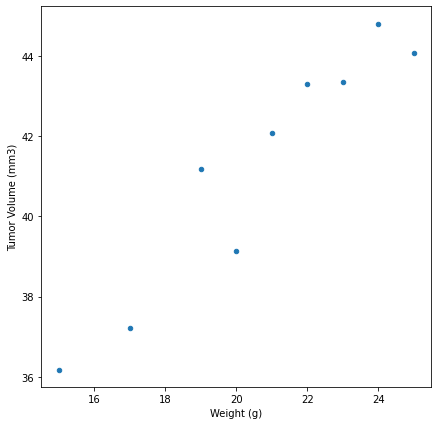

In [232]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_mouse = mouse_study_combine[mouse_study_combine["Drug Regimen"].isin(["Capomulin"])]

capomulin_mouse_df = tr_regimes[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]

capomulin_sorted = capomulin_mouse.sort_values(["Weight (g)"], ascending=True)

avg_weight = capomulin_scatter_plot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

capomulin_vol = capo_avg.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', figsize= (7,7))

## Correlation and Regression

Text(0, 0.5, 'Tumor Volume (mm3)')

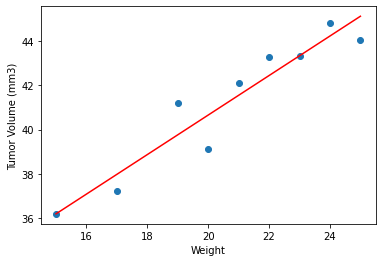

In [233]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_value = capo_grouped_plot["Weight (g)"]
y_value = capo_grouped_plot["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y =" + str(slope) + "x + " + str(intercept)

plt.scatter(x_value, y_value)

plt.plot(x_values,regress_values,"r-")

plt.xlabel("Weight")

plt.ylabel("Tumor Volume (mm3)")
